In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import extract_correct_csv


plt.rcParams["figure.autolayout"] = True

In [2]:
data_ = pd.read_csv('data/gaze/fixations.csv')
fixations_real = pd.read_csv('/Users/marcoghezzi/PycharmProjects/pythonProject/fixations_aligned.csv')
subs = extract_correct_csv.extract_only_valid_subject()
trials = [17, 34]
delta_y, delta_x = 1080 / 2 - 676 / 2, 1920 / 2 - 642 / 2
print(len(subs))
len(trials)*len(subs)

30


60

In [ ]:
fig, axs = plt.subplots(len(subs), len(trials), figsize = (8, 150), )

custom_xlim = (0, 700)
custom_ylim = (700,0)

plt.setp(axs, xlim=custom_xlim, ylim=custom_ylim)
i = 0
for sub in subs:
    j = 0
    for trial in trials:
        axs[i,j].grid(False)
        data_sub_trial = data_[(data_.Subject == sub) & (data_.Trial==trial)]
        x_points = data_sub_trial.X_Coord.values-delta_x
        y_points = data_sub_trial.Y_Coord.values-delta_y

        fixations_sub = fixations_real[fixations_real['RECORDING_SESSION_LABEL'] == sub]
        x_points_real = np.array(fixations_sub[fixations_sub['TRIAL_LABEL'] == trial]['CURRENT_FIX_X'] - delta_x)
        y_points_real = np.array(fixations_sub[fixations_sub['TRIAL_LABEL'] == trial]['CURRENT_FIX_Y'] - delta_y)
        string_sub = extract_correct_csv.read_correct_subject_csv(sub)
        true_image = pd.read_csv('data/newLookAtMe/newLookAtMe' + string_sub + '.csv')
        true_image = true_image[true_image['trial'] == trial]['picName'].iloc[0][5:]
        path = '/Users/marcoghezzi/PycharmProjects/pythonProject/osfstorage-archive-info/stim/' + true_image
        picture = np.asarray(Image.open(path))
        axs[i, j].imshow(picture)
        axs[i, j].scatter(x_points_real, y_points_real, color = 'orange')
        for a in range(len(x_points_real)):
            axs[i, j].text(x_points_real[a], y_points_real[a], a+1)
        axs[i, j].plot(x_points_real, y_points_real, color = 'black', linestyle='-', alpha=0.7)
        axs[i, j].set_title(f'Subject: {sub}, trial: {trial}')
        #plt.scatter(x_points, y_points, label='CONVERSANO')
        #plt.scatter(x_points_real, y_points_real, )
        #plt.text(x_)

        #plt.legend()
        j = j+1

    i = i+1



## sPPCA results with gaze

In [4]:
only_gaze_df = pd.read_csv('output/sppca_gaze.csv')
all_views_df = pd.read_csv('output/sppca_physio_gaze.csv')
print(f'only gaze shape: ({only_gaze_df.shape}), all views shape: ({all_views_df.shape})')

only gaze shape: ((630, 6)), all views shape: ((504, 5))


### only gaze, average all subject

In [5]:
def plot_function(df, labelplot1, labelplot2, sub = None):
    columns = ['subject','fold']
    if 'feature' in df.columns:
        columns.append('feature')
    copy_df = df.copy(deep=False)
    if sub:
        copy_df = df[df.subject==sub]
    #print(copy_df.shape)
    gaze_avg = copy_df.drop(columns=columns).groupby(by='k', as_index=False).mean()
    gaze_std = copy_df.drop(columns=columns).groupby(by='k', as_index=False).std()

    X = gaze_avg.k.unique()
    y_1 = gaze_avg.train.values
    deviation_1 = gaze_std.train.values

    y_2 = gaze_avg.test.values
    deviation_2 = gaze_std.test.values

    plt.axes().set_facecolor('#AACAEF')
    plt.plot(X, y_1,'#003566', label=labelplot1)
    plt.fill_between(X, y_1-deviation_1, y_1+deviation_1, alpha=0.08, color = '#003566')
    plt.plot(X, y_2, '#840232', label=labelplot2)
    plt.fill_between(X, y_2-deviation_2, y_2+deviation_2, alpha=0.08, color = '#840232')
    plt.xticks(X)
    plt.grid(visible=None)
    plt.xlabel('Latent space dimension', fontsize=11)
    plt.ylabel('Accuracy', fontsize=11)
    plt.legend()
    plt.show()


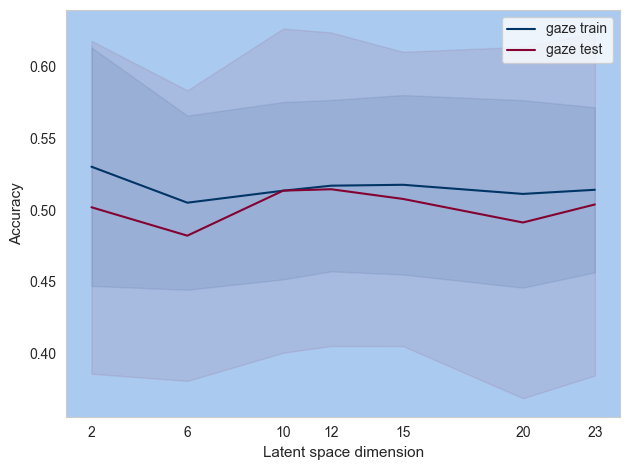

In [6]:
plot_function(only_gaze_df, 'gaze train', 'gaze test')

### only gaze, best subject

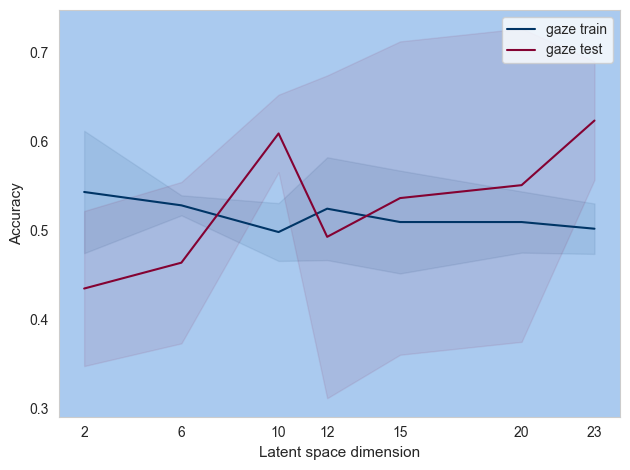

In [7]:
sub = 2
plot_function(only_gaze_df, 'gaze train', 'gaze test', sub)

### all views, average all subjects

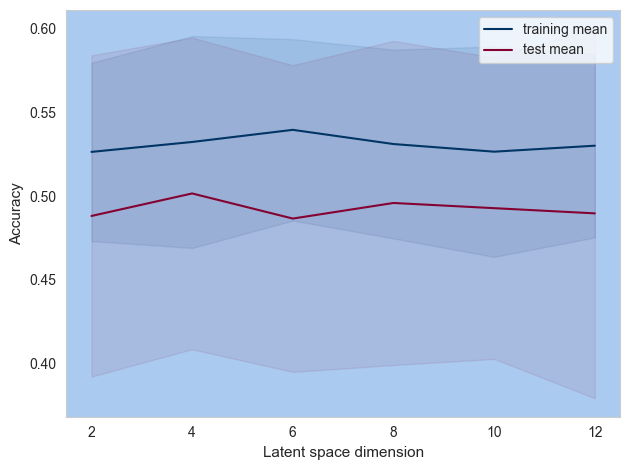

In [8]:
plot_function(all_views_df, 'training mean', 'test mean')

### all views, best subject

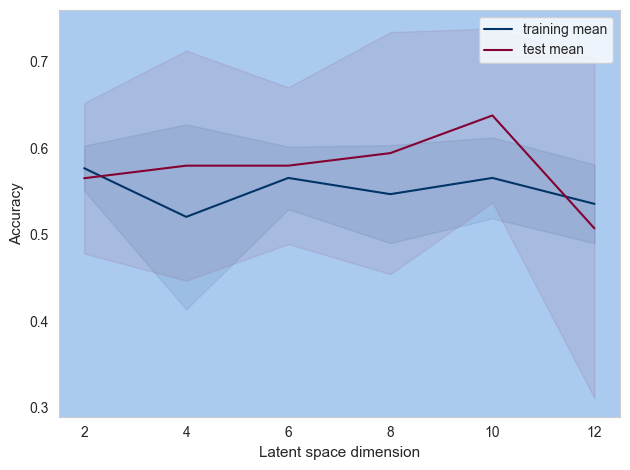

In [9]:
plot_function(all_views_df, 'training mean', 'test mean', 2)

In [31]:
lds_df = pd.read_csv('data/lds_subjects.csv')
sias_df = pd.read_csv('data/sias_score.csv')
list_sub_sias = sias_df.sort_values(by='sias_score', ascending=True)[:10]['subject'].unique()
list_sub_lds = lds_df.sort_values(by='lds', ascending=False)[:10]['subject'].unique()

list_sub_sias_more = sias_df.sort_values(by='sias_score', ascending=False)[:10]['subject'].unique()
list_sub_lds_more = lds_df.sort_values(by='lds', ascending=True)[:10]['subject'].unique()

In [32]:
less_gen_LDS = all_views_df[all_views_df.subject.isin(list_sub_lds)]
less_gen_sias = all_views_df[all_views_df.subject.isin(list_sub_sias)]

more_gen_LDS = all_views_df[all_views_df.subject.isin(list_sub_lds_more)]
more_gen_sias = all_views_df[all_views_df.subject.isin(list_sub_sias_more)]

## Low fear gen subjects

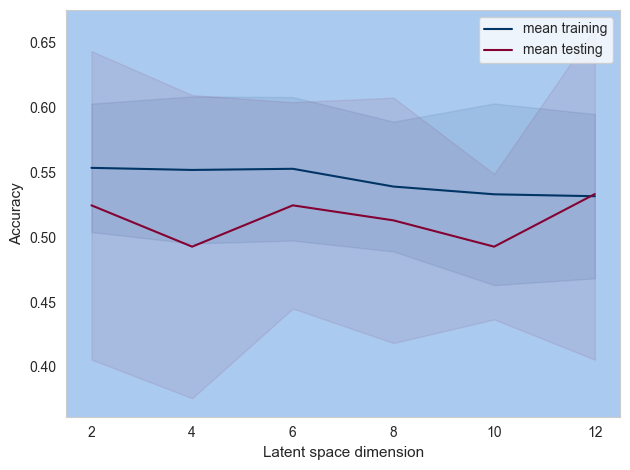

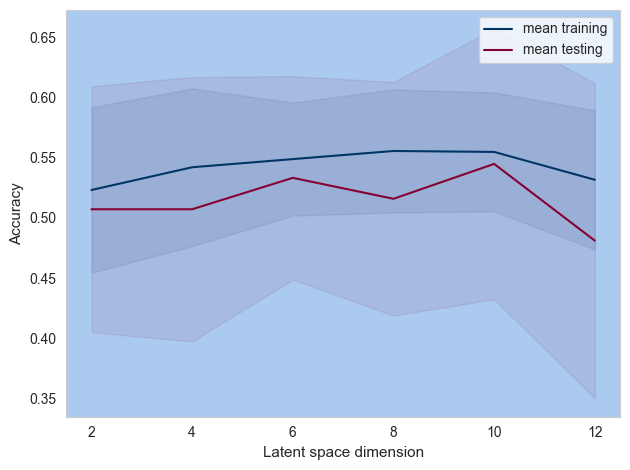

In [34]:
plot_function(less_gen_LDS, 'mean training', 'mean testing')
plot_function(less_gen_sias, 'mean training', 'mean testing')

## High fear subjects

In [39]:
less_gen_sias

,subject,k,fold,train,test
18,2,2,0,0.561798,0.652174
19,2,2,1,0.561798,0.565217
20,2,2,2,0.606742,0.478261
21,2,4,0,0.415730,0.434783
22,2,4,1,0.516854,0.695652
...,...,...,...,...,...
463,51,10,1,0.651685,0.434783
464,51,10,2,0.539326,0.565217
465,51,12,0,0.505618,0.478261
466,51,12,1,0.550562,0.260870


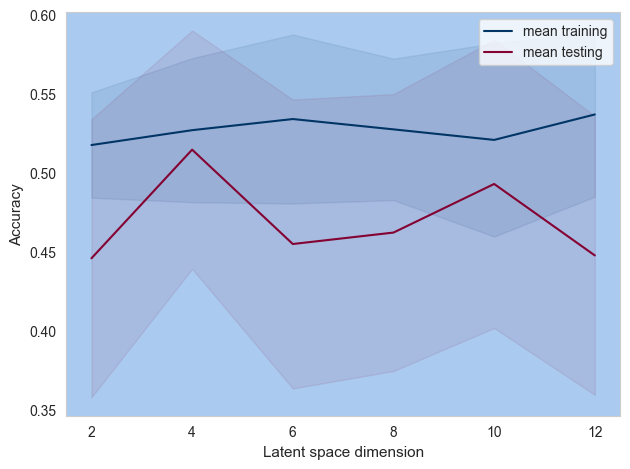

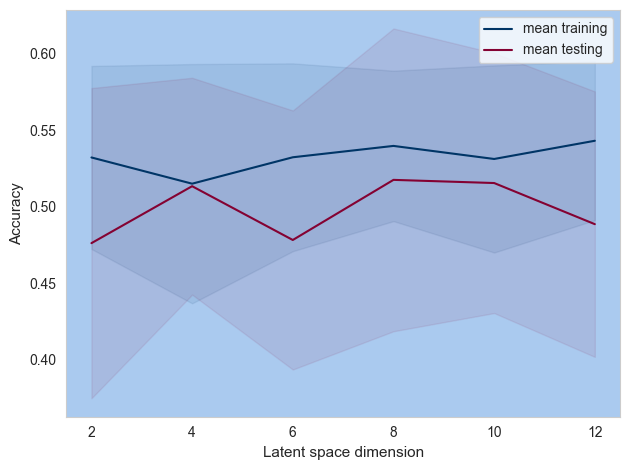

In [35]:
plot_function(more_gen_LDS, 'mean training', 'mean testing')
plot_function(more_gen_sias, 'mean training', 'mean testing')

## Heat map

In [2]:
import numpy as np
import pandas as pd
import extract_correct_csv
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mpl

plt.rcParams.update({'font.size': 12})
plt.rcParams["figure.autolayout"] = True

In [3]:
def anxious_subjects(path, n, sort_type='top'):
    '''
    :param path: path sias score or linear deviation score
    :param n: number of subjects
    :param sort_type: 'top' or 'bot'
    :return: top or bot n subjects sorted by sias score
    '''
    valid_subjects = extract_correct_csv.extract_only_valid_subject()
    df = pd.read_csv(path).dropna().reset_index(drop=True)
    df = df[df.subject.isin(valid_subjects)]
    df['subject'] = [int(x) for x in df['subject']]
    if sort_type== 'top':
        return df.sort_values(by=df.columns[1], ascending=False).subject[:n].values
    else:
        return df.sort_values(by=df.columns[1], ascending=False).subject[-n:].values

path_sias = 'data/sias_score.csv'
path_lds = 'data/lds_subjects.csv'

len_sub = 6
top_lds = anxious_subjects(path_lds, len_sub, 'top')
bot_lds = anxious_subjects(path_lds, len_sub, 'bot')

top_sias = anxious_subjects(path_sias, len_sub)
bot_sias = anxious_subjects(path_sias, len_sub, 'bot')

/var/folders/hn/nq1_cby521sbf58lnj9qj9mw0000gn/T/ipykernel_9650/558888276.py:13: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return df.sort_values(by=df.columns[1], ascending=False).subject[:n].values
/var/folders/hn/nq1_cby521sbf58lnj9qj9mw0000gn/T/ipykernel_9650/558888276.py:15: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return df.sort_values(by=df.columns[1], ascending=False).subject[-n:].values
/var/folders/hn/nq1_cby521sbf58lnj9qj9mw0000gn/T/ipykernel_9650/558888276.py:

In [4]:
fixations = pd.read_csv('/Users/marcoghezzi/PycharmProjects/pythonProject/fixations_aligned.csv')

# top lds subjects fixations
fix_higher_lds = fixations[fixations.RECORDING_SESSION_LABEL.isin(top_lds)]

# lower lds subjects fixations
fix_lower_lds = fixations[fixations.RECORDING_SESSION_LABEL.isin(bot_lds)]

In [5]:
trials = dict()

# extract trials corresponding to each visual stimulus
for sub in top_lds:
    string_sub = extract_correct_csv.read_correct_subject_csv(sub)
    data = pd.read_csv('data/newLookAtMe/newLookAtMe'+string_sub+'.csv')
    unique_pic_subject = data.picName.unique()
    # trials for each stimulus

    for stim in unique_pic_subject:
        list_trials = data[data.picName == stim]['trial'].unique()
        if stim not in trials:
            trials[stim] = {sub: list_trials}
        else:
            trials[stim].update({sub: list_trials})

/var/folders/hn/nq1_cby521sbf58lnj9qj9mw0000gn/T/ipykernel_9650/506936665.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values_trials = np.array(list(trials[x].values()))
/var/folders/hn/nq1_cby521sbf58lnj9qj9mw0000gn/T/ipykernel_9650/506936665.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values_trials = np.array(list(trials[x].values()))
/var/folders/hn/nq1_cby521sbf58lnj9qj9mw0000gn/T/ipykernel_9650/506936665.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuple

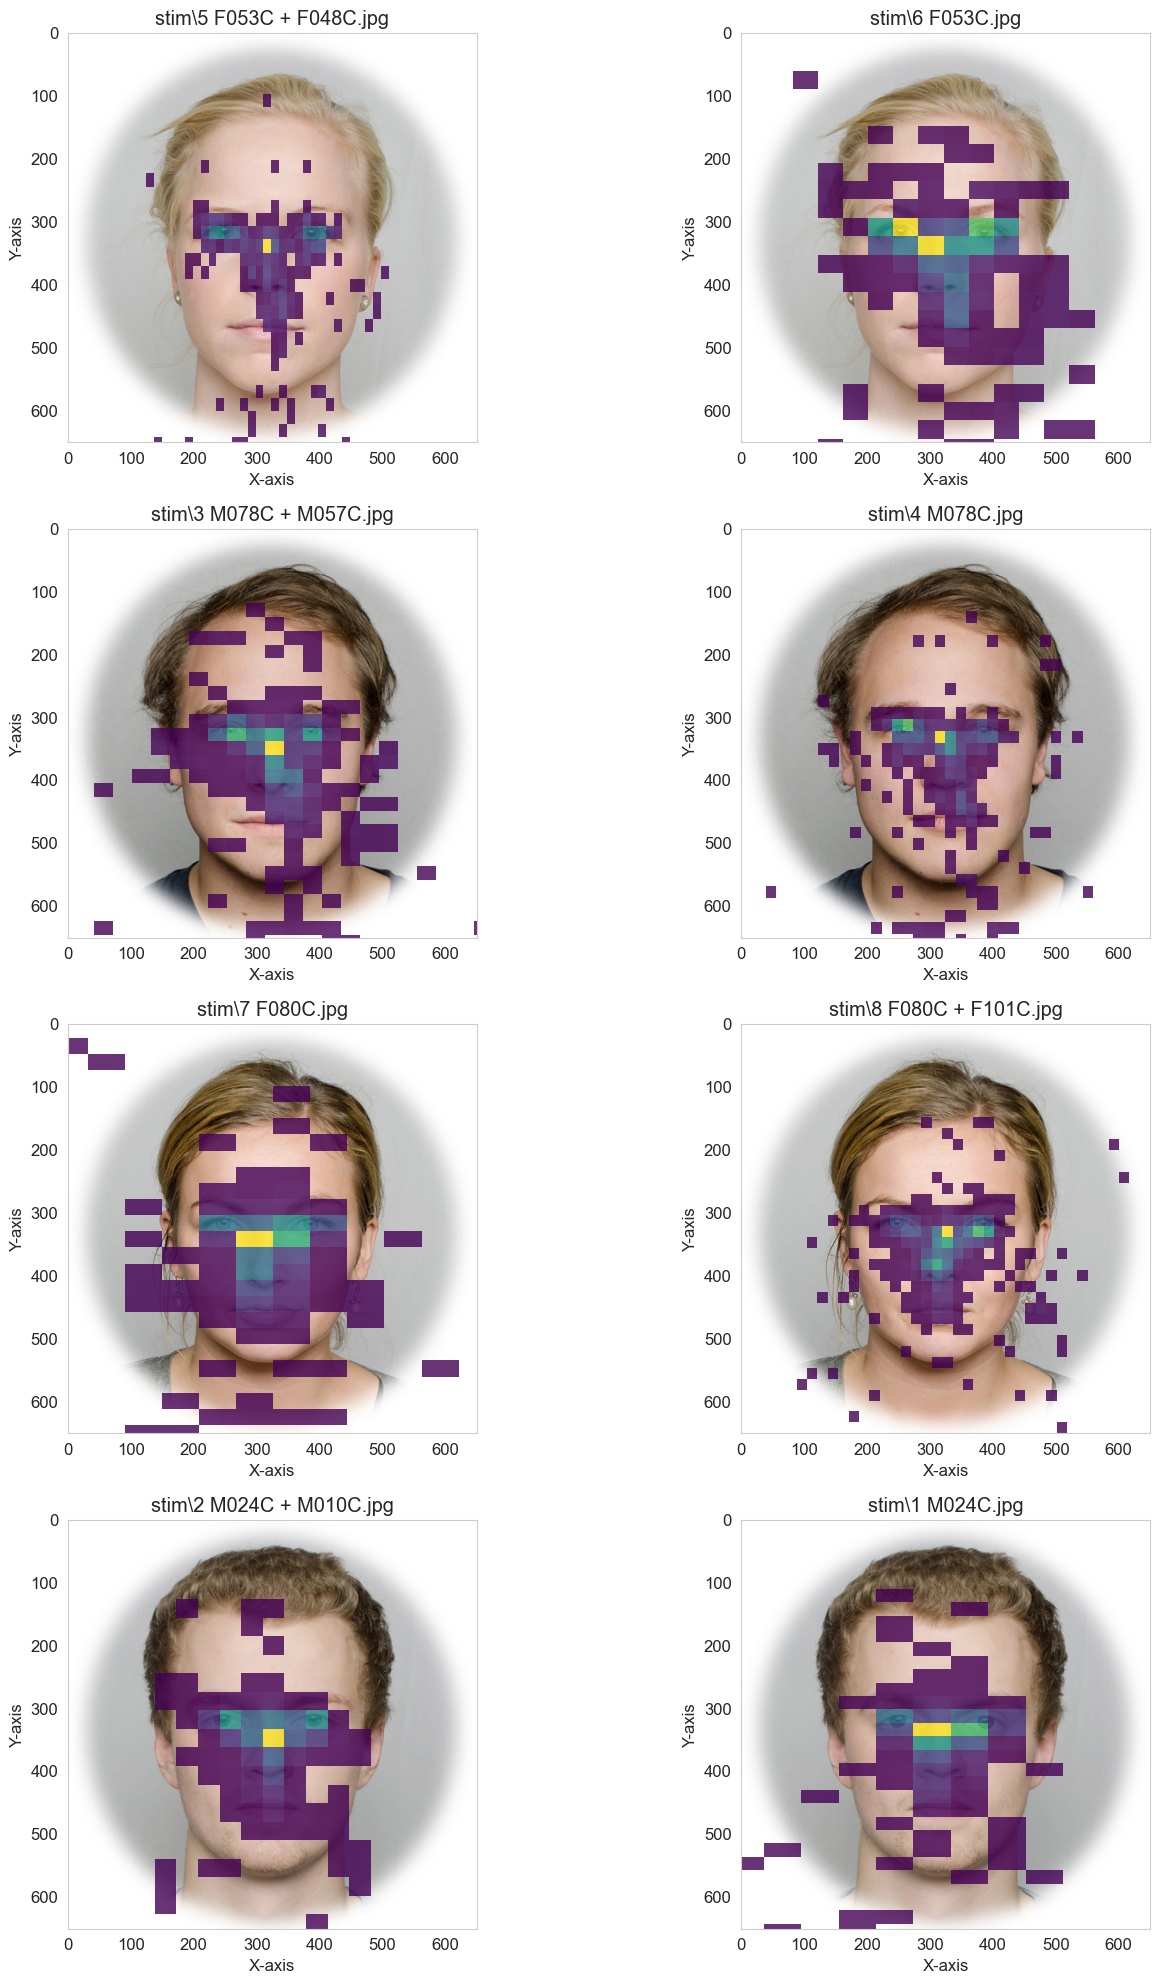

In [6]:
# index subplot

fig, ax = plt.subplots(4, 2, figsize=(15, 20))
ax = ax.ravel()

k = 0
for x in trials.keys():
    # correct path given the picName
    if 'morph' not in x:
        path = '/Users/marcoghezzi/PycharmProjects/pythonProject/osfstorage-archive-info/stim/'+x[5:]
    else:
        continue
        #path = '/Users/marcoghezzi/PycharmProjects/pythonProject/osfstorage-archive-info/stim/morph/'+x[11:]

    # checking all the trials of that path
    keys=np.array(list(trials[x].keys()))
    values_trials = np.array(list(trials[x].values()))
    df_temp = pd.DataFrame(columns = fix_higher_lds.columns)
    for index, sub in enumerate(keys):
        df_tmp = fix_higher_lds[fix_higher_lds.RECORDING_SESSION_LABEL == sub]
        df_tmp2 = df_tmp[df_tmp.TRIAL_LABEL.isin(values_trials[index])]
        df_temp = pd.concat([df_temp, df_tmp2], axis=0)
    all_fixations = np.array(df_temp[['CURRENT_FIX_X', 'CURRENT_FIX_Y']])

    # correction for plotting
    delta_y, delta_x = 1080 / 2 - 676 / 2, 1920 / 2 - 642 / 2
    all_fixations[:,0] = all_fixations[:,0] - delta_x
    all_fixations[:,1] = all_fixations[:,1] - delta_y
    # Load the background image
    img = mpimg.imread(path)




    #ax.scatter(all_fixations[:,0], all_fixations[:,1], alpha=0.5)
    cmap = mpl.cm.viridis
    hist = ax[k].hist2d(all_fixations[:,0], all_fixations[:,1], bins=45, cmin=1, cmap=cmap, alpha=0.8,)

    ax[k].imshow(img)
    ax[k].set_ylim([650, 0])
    ax[k].set_xlim([0, 650])
    #fig.colorbar(hist[3])
    #im = ax.imshow(heatmap.T, cmap='hot', alpha=0.5, extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])


    # Set plot title and labels
    ax[k].set_title(f'{x}')
    ax[k].set_xlabel('X-axis')
    ax[k].set_ylabel('Y-axis')

    # increase plot index
    k = k + 1

# Show the plot
plt.show()

In [7]:
trials = dict()

# extract trials corresponding to each visual stimulus
for sub in bot_lds:
    string_sub = extract_correct_csv.read_correct_subject_csv(sub)
    data = pd.read_csv('data/newLookAtMe/newLookAtMe'+string_sub+'.csv')
    unique_pic_subject = data.picName.unique()
    # trials for each stimulus

    for stim in unique_pic_subject:
        list_trials = data[data.picName == stim]['trial'].unique()
        if stim not in trials:
            trials[stim] = {sub: list_trials}
        else:
            trials[stim].update({sub: list_trials})
trials

{'stim\\8 F080C + F101C.jpg': {1: array([  1,   5,  12,  14,  18,  21,  27,  29,  36,  38,  42,  48,  57,
          73,  85,  95, 113, 132, 135, 158]),
  13: array([  1,   5,  12,  14,  18,  21,  27,  29,  36,  38,  42,  48,  57,
          73,  85,  95, 113, 132, 135, 158]),
  17: array([  1,   5,  12,  14,  18,  21,  27,  29,  36,  38,  42,  48,  57,
          73,  85,  95, 113, 132, 135, 158])},
 'stim\\7 F080C.jpg': {1: array([  2,   8,  11,  15,  20,  22,  26,  32,  34,  37,  43,  47,  58,
          61,  66,  71,  84,  87,  93,  96, 106, 116, 122, 129, 137, 143,
         146, 160]),
  13: array([  2,   8,  11,  15,  20,  22,  26,  32,  34,  37,  43,  47,  58,
          61,  66,  71,  84,  87,  93,  96, 106, 116, 122, 129, 137, 143,
         146, 160]),
  17: array([  2,   8,  11,  15,  20,  22,  26,  32,  34,  37,  43,  47,  58,
          61,  66,  71,  84,  87,  93,  96, 106, 116, 122, 129, 137, 143,
         146, 160])},
 'stim\\1 M024C.jpg': {1: array([  3,   7,  10,  13,  17,  

/var/folders/hn/nq1_cby521sbf58lnj9qj9mw0000gn/T/ipykernel_9650/2675699920.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values_trials = np.array(list(trials[x].values()))
/var/folders/hn/nq1_cby521sbf58lnj9qj9mw0000gn/T/ipykernel_9650/2675699920.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values_trials = np.array(list(trials[x].values()))
/var/folders/hn/nq1_cby521sbf58lnj9qj9mw0000gn/T/ipykernel_9650/2675699920.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tu

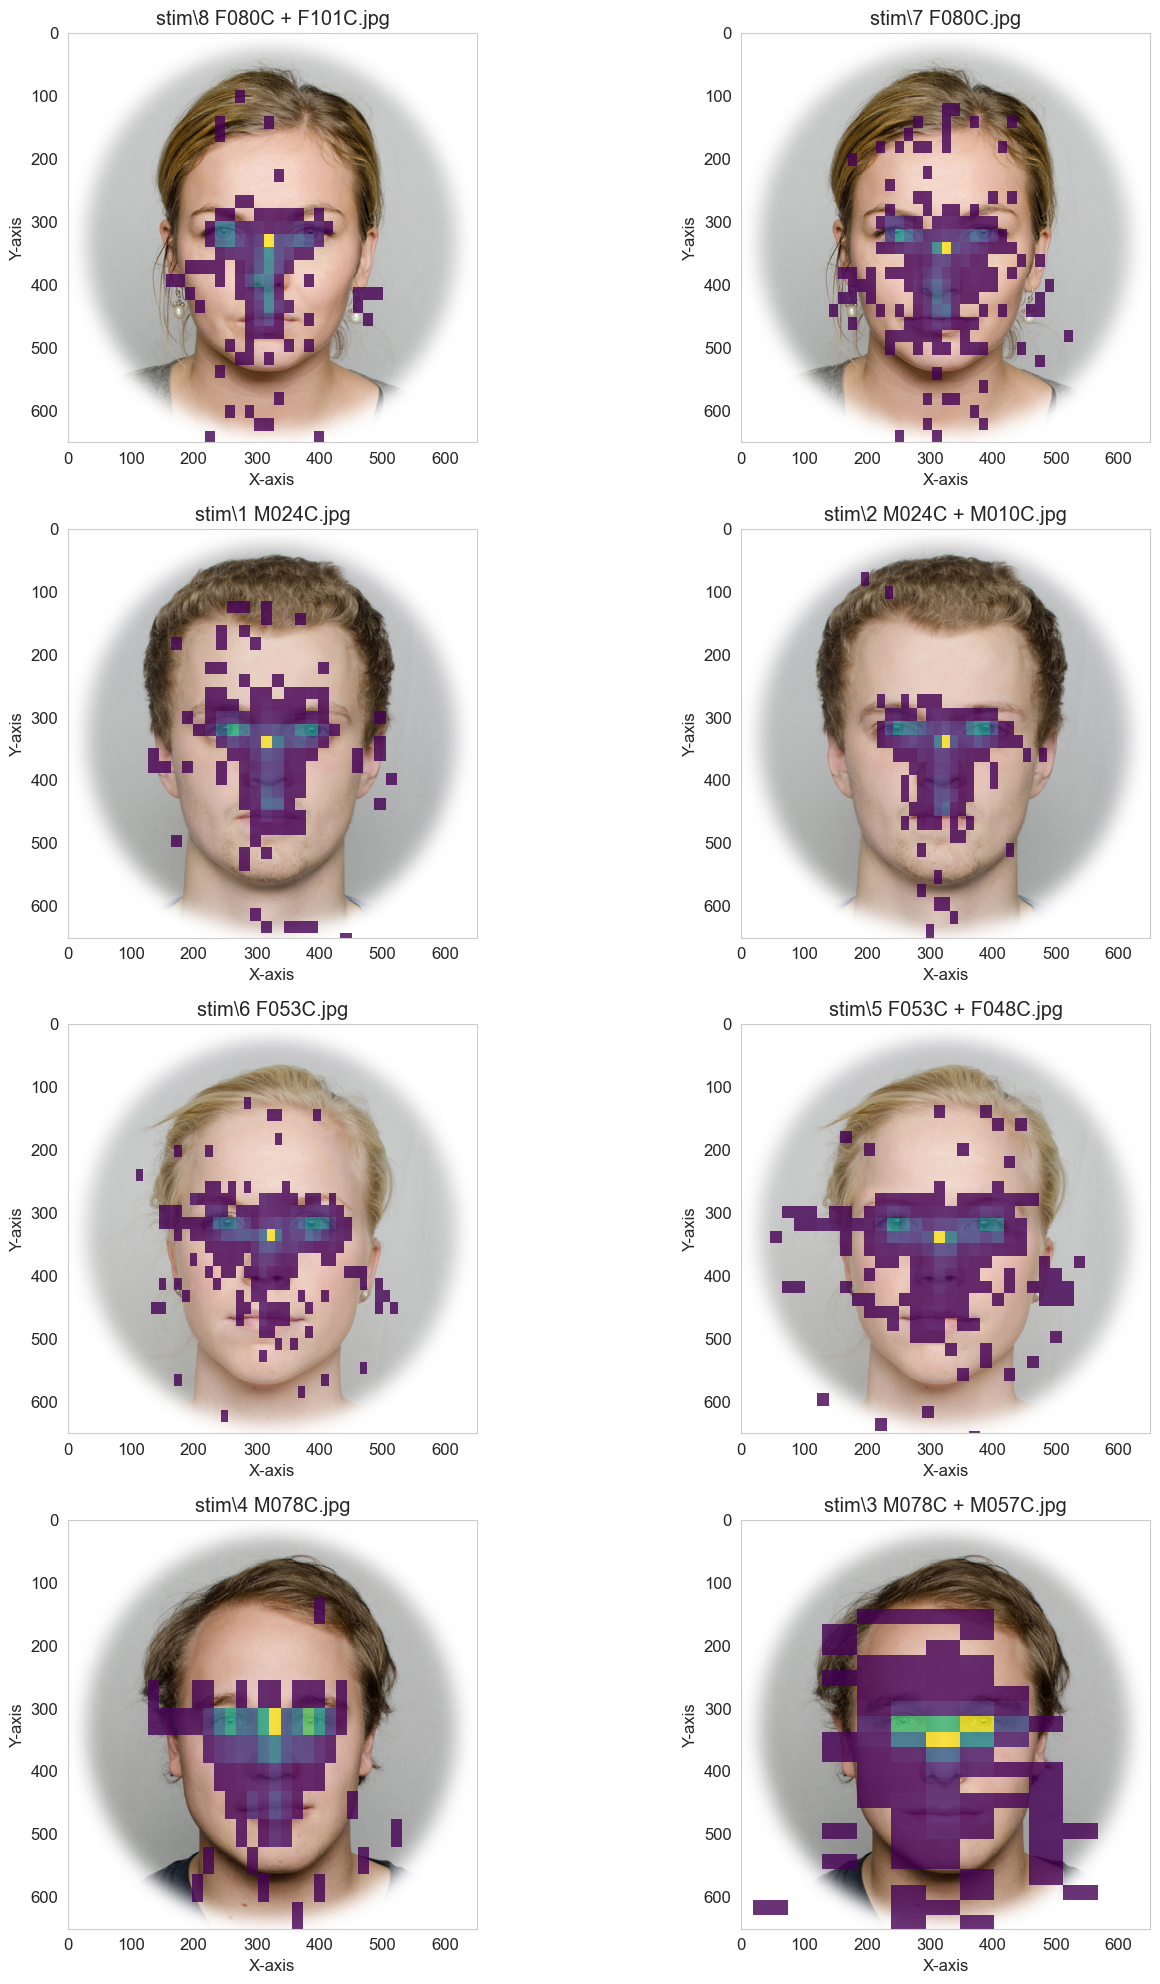

In [9]:
# index subplot
k = 0

fig, ax = plt.subplots(4, 2, figsize=(15, 20))
ax = ax.ravel()

for x in trials.keys():
    # correct path given the picName
    if 'morph' not in x:
        path = '/Users/marcoghezzi/PycharmProjects/pythonProject/osfstorage-archive-info/stim/'+x[5:]
    else:
        continue

    # checking all the trials of that path
    keys=np.array(list(trials[x].keys()))
    values_trials = np.array(list(trials[x].values()))
    df_temp = pd.DataFrame(columns = fix_lower_lds.columns)
    for index, sub in enumerate(keys):
        df_tmp = fix_lower_lds[fix_lower_lds.RECORDING_SESSION_LABEL == sub]
        df_tmp2 = df_tmp[df_tmp.TRIAL_LABEL.isin(values_trials[index])]
        df_temp = pd.concat([df_temp, df_tmp2], axis=0)
    all_fixations = np.array(df_temp[['CURRENT_FIX_X', 'CURRENT_FIX_Y']])

    # correction for plotting
    delta_y, delta_x = 1080 / 2 - 676 / 2, 1920 / 2 - 642 / 2
    all_fixations[:,0] = all_fixations[:,0] - delta_x
    all_fixations[:,1] = all_fixations[:,1] - delta_y
    # Load the background image
    img = mpimg.imread(path)



    #ax.scatter(all_fixations[:,0], all_fixations[:,1], alpha=0.5)
    cmap = mpl.cm.viridis
    hist = ax[k].hist2d(all_fixations[:,0], all_fixations[:,1], bins=40, cmin=1, cmap=cmap, alpha=0.8)
    ax[k].imshow(img)
    ax[k].set_ylim([650, 0])
    ax[k].set_xlim([0, 650])
    #fig.colorbar(hist[3])
    #im = ax.imshow(heatmap.T, cmap='hot', alpha=0.5, extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])


    # Set plot title and labels
    ax[k].set_title(f'{x}')
    ax[k].set_xlabel('X-axis')
    ax[k].set_ylabel('Y-axis')

    # increase plot index
    k = k + 1

# Show the plot
plt.show()